In [1]:
import pandas as pd
data = pd.read_spss('GEM 2019 APS Global National Level Data_27Feb2020.sav')

Note: you may need to restart the kernel to use updated packages.


c:\Users\Omar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\spss.py:66: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df, metadata = pyreadstat.read_sav(
c:\Users\Omar\AppData\Local\Programs\Python\Python312\Lib\site-pa

In [3]:
data.head

<bound method NDFrame.head of                  country          country_name               ctryalp  \
0          United States         United States         United States   
1                 Russia                Russia                Russia   
2                  Egypt                 Egypt                 Egypt   
3           South Africa          South Africa          South Africa   
4                 Greece                Greece                Greece   
5            Netherlands           Netherlands           Netherlands   
6                  Spain                 Spain                 Spain   
7                  Italy                 Italy                 Italy   
8            Switzerland           Switzerland           Switzerland   
9         United Kingdom        United Kingdom        United Kingdom   
10                Sweden                Sweden                Sweden   
11                Norway                Norway                Norway   
12                Poland          

In [3]:
%pip install pyecharts
%pip install dash-bootstrap-components

   ---------------------------------------- 0.0/146.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/146.3 kB ? eta -:--:--
   -------- ------------------------------ 30.7/146.3 kB 660.6 kB/s eta 0:00:01
   ---------------- ---------------------- 61.4/146.3 kB 550.5 kB/s eta 0:00:01
   ------------------------ -------------- 92.2/146.3 kB 751.6 kB/s eta 0:00:01
   -------------------------------------  143.4/146.3 kB 774.0 kB/s eta 0:00:01
   -------------------------------------- 146.3/146.3 kB 727.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/75.4 kB ? eta -:--:--
   --------------------- ------------------ 41.0/75.4 kB ? eta -:--:--
   --------------------- ------------------ 41.0/75.4 kB ? eta -:--:--
   ---------------------------------------- 75.4/75.4 kB 521.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/221.2 kB ? eta -:--:--
   -------------------------

In [4]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
from dash.dependencies import State
import dash_bootstrap_components as dbc

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H1("Selected Key Indicator"),
    dcc.Dropdown(
        id="country-dropdown",
        options=[{"label": country, "value": country} for country in data["country"].unique()],
        value=data["country"].unique()[0]
    ),
    dbc.Row([
        dbc.Col(dcc.Graph(id="frfail19-gauge"), width=6),
        dbc.Col(dcc.Graph(id="futsup19-gauge"), width=6),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id="opport19-gauge"), width=6),
        dbc.Col(dcc.Graph(id="Knoent19-gauge"), width=6),
    ])
])

@app.callback(
    Output("frfail19-gauge", "figure"),
    [Input("country-dropdown", "value")]
)
def update_frfail19_gauge(country):
    filtered_data = data[data["country"] == country]
    frfail19 = filtered_data["Frfail19"].values[0]
    
    figure = {
        "data": [
            {
                "type": "indicator",
                "mode": "gauge+number",
                "value": frfail19,
                "title": {"text": "Fear of Failure (Frfail19)"},
                "gauge": {
                    "axis": {"range": [0, 100]},
                    "bar": {"color": "darkblue"},
                    "steps": [
                        {"range": [0, 50], "color": "lightgray"},
                        {"range": [50, 100], "color": "gray"}
                    ],
                    "threshold": {
                        "line": {"color": "red", "width": 4},
                        "thickness": 0.75,
                        "value": 80
                    }
                }
            }
        ],
        "layout": {
            "width": 400,
            "height": 300,
            "margin": {"l": 50, "r": 50, "t": 50, "b": 50}
        }
    }
    
    return figure

@app.callback(
    Output("futsup19-gauge", "figure"),
    [Input("country-dropdown", "value")]
)
def update_futsup19_gauge(country):
    filtered_data = data[data["country"] == country]
    futsup19 = filtered_data["Futsup19"].values[0]
    
    figure = {
        "data": [
            {
                "type": "indicator",
                "mode": "gauge+number",
                "value": futsup19,
                "title": {"text": "I'd start in 3 years (Futsup19)"},
                "gauge": {
                    "axis": {"range": [0, 100]},
                    "bar": {"color": "darkblue"},
                    "steps": [
                        {"range": [0, 50], "color": "lightgray"},
                        {"range": [50, 100], "color": "gray"}
                    ],
                    "threshold": {
                        "line": {"color": "red", "width": 4},
                        "thickness": 0.75,
                        "value": 80
                    }
                }
            }
        ],
        "layout": {
            "width": 400,
            "height": 300,
            "margin": {"l": 50, "r": 50, "t": 50, "b": 50}
        }
    }
    
    return figure

@app.callback(
    Output("opport19-gauge", "figure"),
    [Input("country-dropdown", "value")]
)
def update_opport19_gauge(country):
    filtered_data = data[data["country"] == country]
    opport19 = filtered_data["Opport19"].values[0]
    
    figure = {
        "data": [
            {
                "type": "indicator",
                "mode": "gauge+number",
                "value": opport19,
                "title": {"text": "Good conditions to start in 6 months (Opport19)"},
                "gauge": {
                    "axis": {"range": [0, 100]},
                    "bar": {"color": "darkblue"},
                    "steps": [
                        {"range": [0, 50], "color": "lightgray"},
                        {"range": [50, 100], "color": "gray"}
                    ],
                    "threshold": {
                        "line": {"color": "red", "width": 4},
                        "thickness": 0.75,
                        "value": 80
                    }
                }
            }
        ],
        "layout": {
            "width": 400,
            "height": 300,
            "margin": {"l": 50, "r": 50, "t": 50, "b": 50}
        }
    }
    
    return figure

@app.callback(
    Output("Knoent19-gauge", "figure"),
    [Input("country-dropdown", "value")]
)
def update_knowent_gauge(country):
    filtered_data = data[data["country"] == country]
    knowent = filtered_data["Knoent19"].values[0]
    
    figure = {
        "data": [
            {
                "type": "indicator",
                "mode": "gauge+number",
                "value": knowent,
                "title": {"text": "I know someone (Knoent19)"},
                "gauge": {
                    "axis": {"range": [0, 100]},
                    "bar": {"color": "darkblue"},
                    "steps": [
                        {"range": [0, 50], "color": "lightgray"},
                        {"range": [50, 100], "color": "gray"}
                    ],
                    "threshold": {
                        "line": {"color": "red", "width": 4},
                        "thickness": 0.75,
                        "value": 80
                    }
                }
            }
        ],
        "layout": {
            "width": 400,
            "height": 300,
            "margin": {"l": 50, "r": 50, "t": 50, "b": 50}
        }
    }
    
    return figure

# Run the app
if __name__ == "__main__":
    app.run_server()




In [5]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = html.Div([
    html.H1("Reason to Exit - Country in Region"),
    html.Div([
        html.Label("Select Region:"),
        dcc.Dropdown(
            id="region-dropdown",
            options=[{"label": region, "value": region} for region in data["REGION"].unique()],
            value=data["REGION"].unique()[0]
        )
    ]),
    html.Div([
        html.Label("Select Country:"),
        dcc.Dropdown(
            id="country-dropdown",
            options=[{"label": country, "value": country} for country in data["country"].unique()],
            value=data["country"].unique()[0]
        )
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id="region-chart"), width=6),
        dbc.Col(dcc.Graph(id="country-chart"), width=6),
    ])
])

@app.callback(
    Output("region-chart", "figure"),
    [Input("region-dropdown", "value")]
)
def update_region_chart(region):
    filtered_data = data[data["REGION"] == region]
    avg_values = filtered_data[["EX19_RS1", "EX19_RS2", "EX19_RS3", "EX19_RS4", "EX19_RS5", "EX19_RS6", "EX19_RS7", "EX19_RS8", "EX19_RS11"]].mean()
    labels = ["opportunity to sell", "business not profitable", "problems getting finance", "another job or business opportunity", "exit was planned in advance", "retirement", "family or personal reasons", "incident", "government/tax policy/bureaucracy"]
    
    # Create the region chart
    figure = {
        "data": [
            {
                "type": "bar",
                "x": labels,
                "y": avg_values,
                "marker": {"color": "blue"}
            }
        ],
        "layout": {
            "title": "Average Values by Region",
            "xaxis": {"title": ""},
            "yaxis": {"title": "Average Value"}
        }
    }
    
    return figure

@app.callback(
    Output("country-chart", "figure"),
    [Input("country-dropdown", "value")]
)
def update_country_chart(country):
    filtered_data = data[data["country"] == country]
    values = filtered_data[["EX19_RS1", "EX19_RS2", "EX19_RS3", "EX19_RS4", "EX19_RS5", "EX19_RS6", "EX19_RS7", "EX19_RS8", "EX19_RS11"]].values[0]
    labels = ["opportunity to sell", "business not profitable", "problems getting finance", "another job or business opportunity", "exit was planned in advance", "retirement", "family or personal reasons", "incident", "government/tax policy/bureaucracy"]
    
    figure = {
        "data": [
            {
                "type": "bar",
                "x": labels,
                "y": values,
                "marker": {"color": "green"}
            }
        ],
        "layout": {
            "title": "Values by Country",
            "xaxis": {"title": ""},
            "yaxis": {"title": "Value"}
        }
    }
    
    return figure

# Run the app
if __name__ == "__main__":
    app.run_server()


In [6]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
from dash.dependencies import State
import dash_bootstrap_components as dbc

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H1("What Motivates Entrepreneurs? by country"),
    dcc.Dropdown(
        id="country-dropdown",
        options=[{"label": country, "value": country} for country in data["country"].unique()],
        value=data["country"].unique()[0]
    ),
    dbc.Row([
        dbc.Col(dcc.Graph(id="male-pie-chart"), width=6),
        dbc.Col(dcc.Graph(id="female-pie-chart"), width=6),
    ])
])

@app.callback(
    Output("male-pie-chart", "figure"),
    [Input("country-dropdown", "value")]
)
def update_male_pie_chart(country):
    filtered_data = data[data["country"] == country]
    male_values = filtered_data[["TEA19MMOT1", "TEA19MMOT2", "TEA19MMOT3", "TEA19MMOT4"]].values[0]
    labels = ["Make a Difference", "Make Money", "Family Tradition", "Dream Living"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": male_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "Male Motives",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

@app.callback(
    Output("female-pie-chart", "figure"),
    [Input("country-dropdown", "value")]
)
def update_female_pie_chart(country):
    filtered_data = data[data["country"] == country]
    female_values = filtered_data[["TEA19FMOT1", "TEA19FMOT2", "TEA19FMOT3", "TEA19FMOT4"]].values[0]
    labels = ["Make a Difference", "Make Money", "Family Tradition", "Dream Living"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": female_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "Female Motives",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

# Run the app
if __name__ == "__main__":
    app.run_server()


In [7]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
from dash.dependencies import State
import dash_bootstrap_components as dbc
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = html.Div([
    html.H1("what motivates entrepreneurs? by region"),
    dcc.Dropdown(
        id="region-dropdown",
        options=[{"label": region, "value": region} for region in data["REGION"].unique()],
        value=data["REGION"].unique()[0]
    ),
    dbc.Row([
        dbc.Col(dcc.Graph(id="male-pie-chart"), width=6),
        dbc.Col(dcc.Graph(id="female-pie-chart"), width=6),
    ])
])
@app.callback(
    Output("male-pie-chart", "figure"),
    [Input("region-dropdown", "value")]
)
def update_male_pie_chart(region):
    filtered_data = data[data["REGION"] == region]
    male_values = filtered_data[["TEA19MMOT1", "TEA19MMOT2", "TEA19MMOT3", "TEA19MMOT4"]].values[0]
    labels = ["Make a Difference", "Make Money", "Family Tradition", "Dream Living"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": male_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "Male Motives",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

@app.callback(
    Output("female-pie-chart", "figure"),
    [Input("region-dropdown", "value")]
)
def update_female_pie_chart(region):
    filtered_data = data[data["REGION"] == region]
    female_values = filtered_data[["TEA19FMOT1", "TEA19FMOT2", "TEA19FMOT3", "TEA19FMOT4"]].values[0]
    labels = ["Make a Difference", "Make Money", "Family Tradition", "Dream Living"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": female_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "Female Motives",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

# Run the app
if __name__ == "__main__":
    app.run_server()


In [8]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = html.Div([
    html.H1("New Business Owner-Manager Motives vs Established Business Owner-Manager Motives"),
    dcc.Dropdown(
        id="country-dropdown",
        options=[{"label": country, "value": country} for country in data["country"].unique()],
        value=data["country"].unique()[0]
    ),
    dbc.Row([
        dbc.Col(dcc.Graph(id="new-pie-chart"), width=6),
        dbc.Col(dcc.Graph(id="established-pie-chart"), width=6),
    ])
])
@app.callback(
    Output("new-pie-chart", "figure"),
    [Input("country-dropdown", "value")]
)
def update_new_pie_chart(country):
    filtered_data = data[data["country"] == country]
    nascent_values = filtered_data[["BB_19MOT1yes", "BB_19MOT2yes", "BB_19MOT3yes", "BB_19MOT4yes"]].values[0]
    labels = ["To make a difference", "To build great wealth", "To continue a family tradition", "To earn a living"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": nascent_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "Nascent Entrepreneur Motives",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

@app.callback(
    Output("established-pie-chart", "figure"),
    [Input("country-dropdown", "value")]
)
def update_established_pie_chart(country):
    filtered_data = data[data["country"] == country]
    owner_values = filtered_data[["EB_19MOT1yes", "EB_19MOT2yes", "EB_19MOT3yes", "EB_19MOT4yes"]].values[0]
    labels = ["To make a difference", "To build great wealth", "To continue a family tradition", "To earn a living"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": owner_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "established Business -Manager Motives",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

if __name__ == "__main__":
    app.run_server()


In [9]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H1("The sctors of early and established business"),
    dcc.Dropdown(
        id="region-dropdown",
        options=[{"label": region, "value": region} for region in data["REGION"].unique()],
        value=data["REGION"].unique()[0]
    ),
    dbc.Row([
        dbc.Col(dcc.Graph(id="tea-pie-chart"), width=6),
        dbc.Col(dcc.Graph(id="eb-pie-chart"), width=6),
    ])
])

@app.callback(
    Output("tea-pie-chart", "figure"),
    [Input("region-dropdown", "value")]
)
def update_tea_pie_chart(region):
    filtered_data = data[data["REGION"] == region]
    tea_values = filtered_data[["Tea19s1p", "Tea19s2p", "Tea19s3p", "Tea19s4p"]].values[0]
    labels = ["% within TEA : Extractive sector", "% within TEA : Transforming sector", "% within TEA : Business oriented services", "% within TEA : Consumer oriented services"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": tea_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "Tea Values",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

@app.callback(
    Output("eb-pie-chart", "figure"),
    [Input("region-dropdown", "value")]
)
def update_eb_pie_chart(region):
    filtered_data = data[data["REGION"] == region]
    eb_values = filtered_data[["EB_19s1p", "EB_19s2p", "EB_19s3p", "EB_19s4p"]].values[0]
    labels = ["% within EB : Extractive sector", "% within EB : Transforming sector", "% within EB : Business oriented services", "% within EB : Consumer oriented services"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": eb_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "EB Values",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

if __name__ == "__main__":
    app.run_server()


In [10]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H1("Sectors of early and established business"),
    dcc.Dropdown(
        id="country-dropdown",
        options=[{"label": country, "value": country} for country in data["country"].unique()],
        value=data["country"].unique()[0]
    ),
    dbc.Row([
        dbc.Col(dcc.Graph(id="tea-pie-chart"), width=6),
        dbc.Col(dcc.Graph(id="eb-pie-chart"), width=6),
    ])
])

@app.callback(
    Output("tea-pie-chart", "figure"),
    [Input("country-dropdown", "value")]
)
def update_tea_pie_chart(country):
    filtered_data = data[data["country"] == country]
    tea_values = filtered_data[["Tea19s1p", "Tea19s2p", "Tea19s3p", "Tea19s4p"]].values[0]
    labels = ["Extractive sector", "Transforming sector", "Business oriented services", "Consumer oriented services"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": tea_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "Tea Values",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

@app.callback(
    Output("eb-pie-chart", "figure"),
    [Input("country-dropdown", "value")]
)
def update_eb_pie_chart(country):
    filtered_data = data[data["country"] == country]
    eb_values = filtered_data[["EB_19s1p", "EB_19s2p", "EB_19s3p", "EB_19s4p"]].values[0]
    labels = ["Extractive sector", "Transforming sector", "Business oriented services", "Consumer oriented services"]
    
    figure = {
        "data": [
            {
                "type": "pie",
                "labels": labels,
                "values": eb_values,
                "hole": 0.6,
                "hoverinfo": "label+percent",
                "textinfo": "labels",
                "textposition": "inside",
                "marker": {
                    "colors": ["#FF6384", "#36A2EB", "#FFCE56", "#8B008B"]
                }
            }
        ],
        "layout": {
            "title": "EB Values",
            "width": 600,
            "height": 500
        }
    }
    
    return figure

if __name__ == "__main__":
    app.run_server()


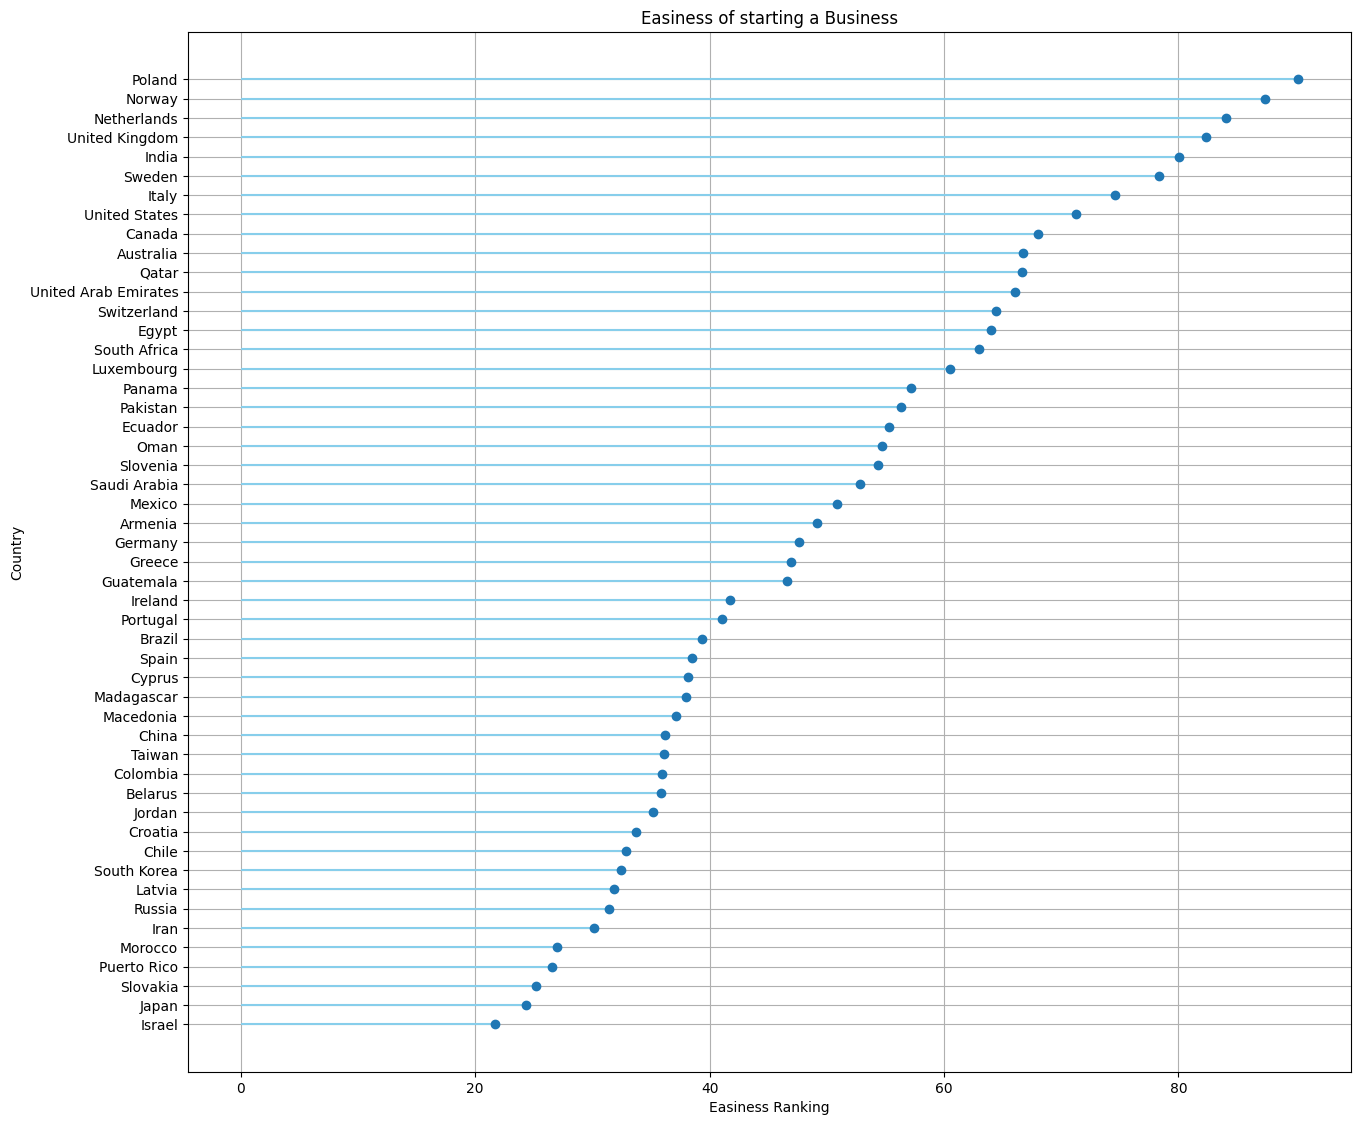

In [13]:
import matplotlib.pyplot as plt

ordered_df = data.sort_values(by='EASYST19')
my_range = range(1, len(ordered_df.index) + 1)

fig, ax = plt.subplots(figsize=(15, 13.5))  # Increase the figure size by 150%
ax.hlines(y=my_range, xmin=0, xmax=ordered_df['EASYST19'], color='skyblue')
ax.plot(ordered_df['EASYST19'], my_range, "o")

ax.set_yticks(my_range)
ax.set_yticklabels(ordered_df['country'])
ax.set_title("Easiness of starting a Business")
ax.set_xlabel('Easiness Ranking')
ax.set_ylabel('Country')

ax.grid(True)
plt.show()


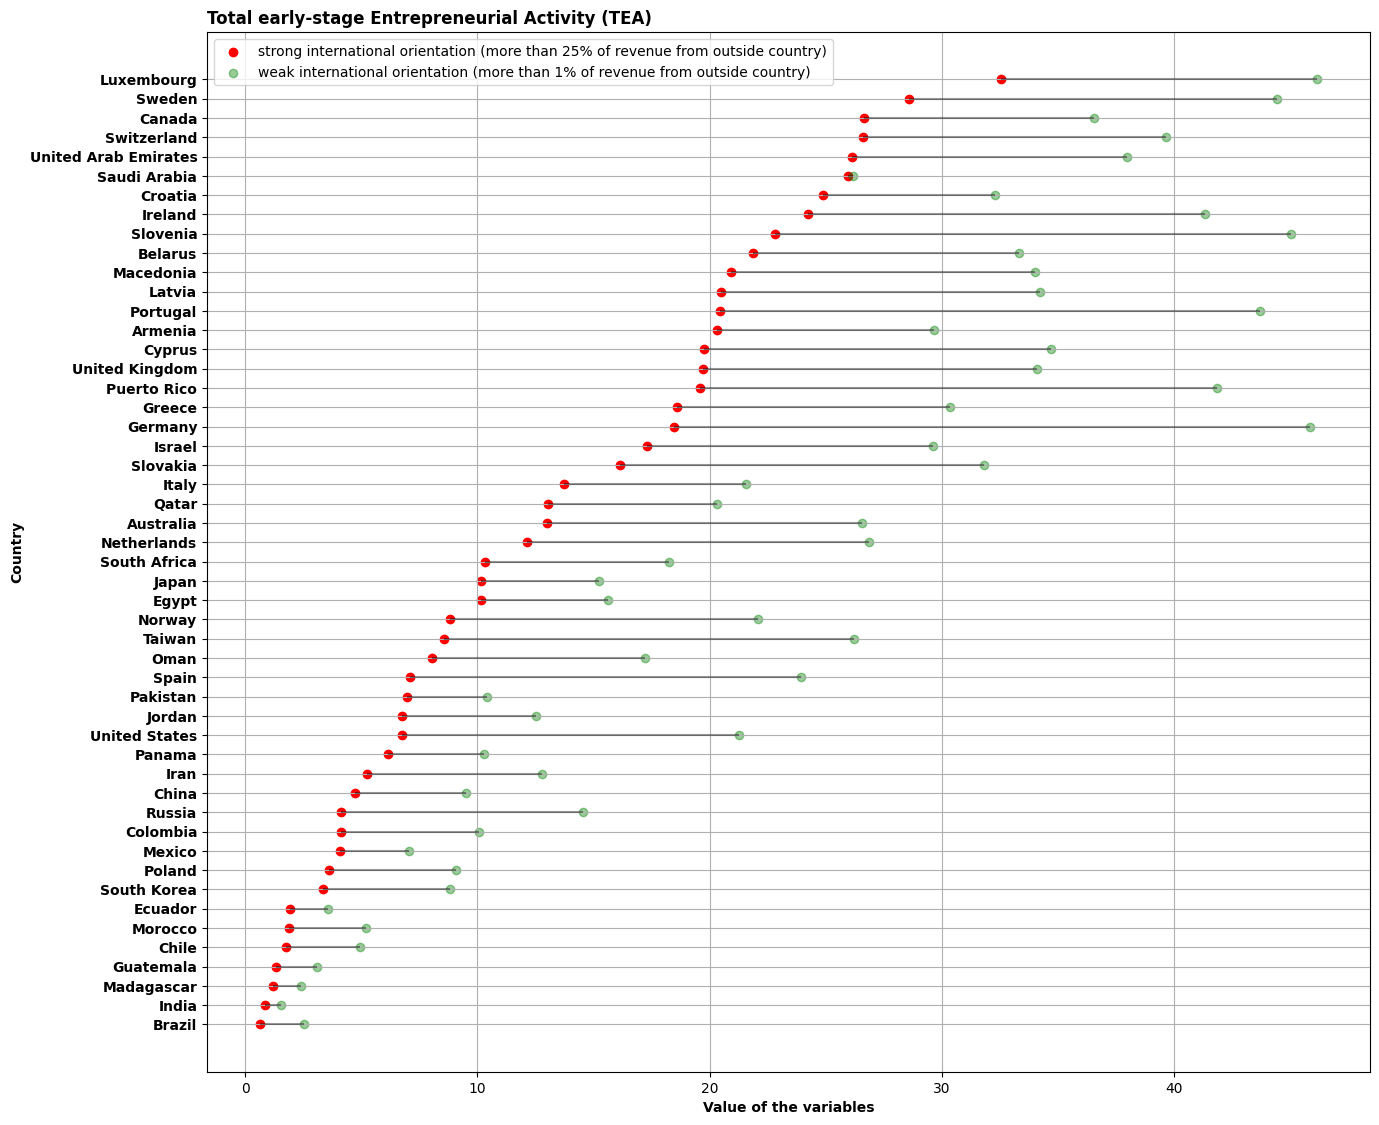

In [14]:
ordered_df = data.sort_values(by=['TEAexpst'])
my_range = range(1, len(ordered_df.index) + 1)
fig, ax = plt.subplots(figsize=(15, 13.5)) 
ax.hlines(y=my_range, xmin=ordered_df['TEAexpst'], xmax=ordered_df['TEAexpwk'], color='black', alpha=0.4)
ax.scatter(ordered_df['TEAexpst'], my_range, color='red', alpha=1, label='strong international orientation (more than 25% of revenue from outside country)')
ax.scatter(ordered_df['TEAexpwk'], my_range, color='green', alpha=0.4, label='weak international orientation (more than 1% of revenue from outside country)')
ax.legend()
ax.set_yticks(my_range)
ax.set_yticklabels(ordered_df['country'], fontweight='bold')  
ax.set_title("Total early-stage Entrepreneurial Activity (TEA)", loc='left', fontweight='bold')  
ax.set_xlabel('Value of the variables', fontweight='bold')  
ax.set_ylabel('Country', fontweight='bold')  

ax.grid(True)

plt.show()


In [16]:
%pip install adjustText

Note: you may need to restart the kernel to use updated packages.


add regression line and descriptive statistics 

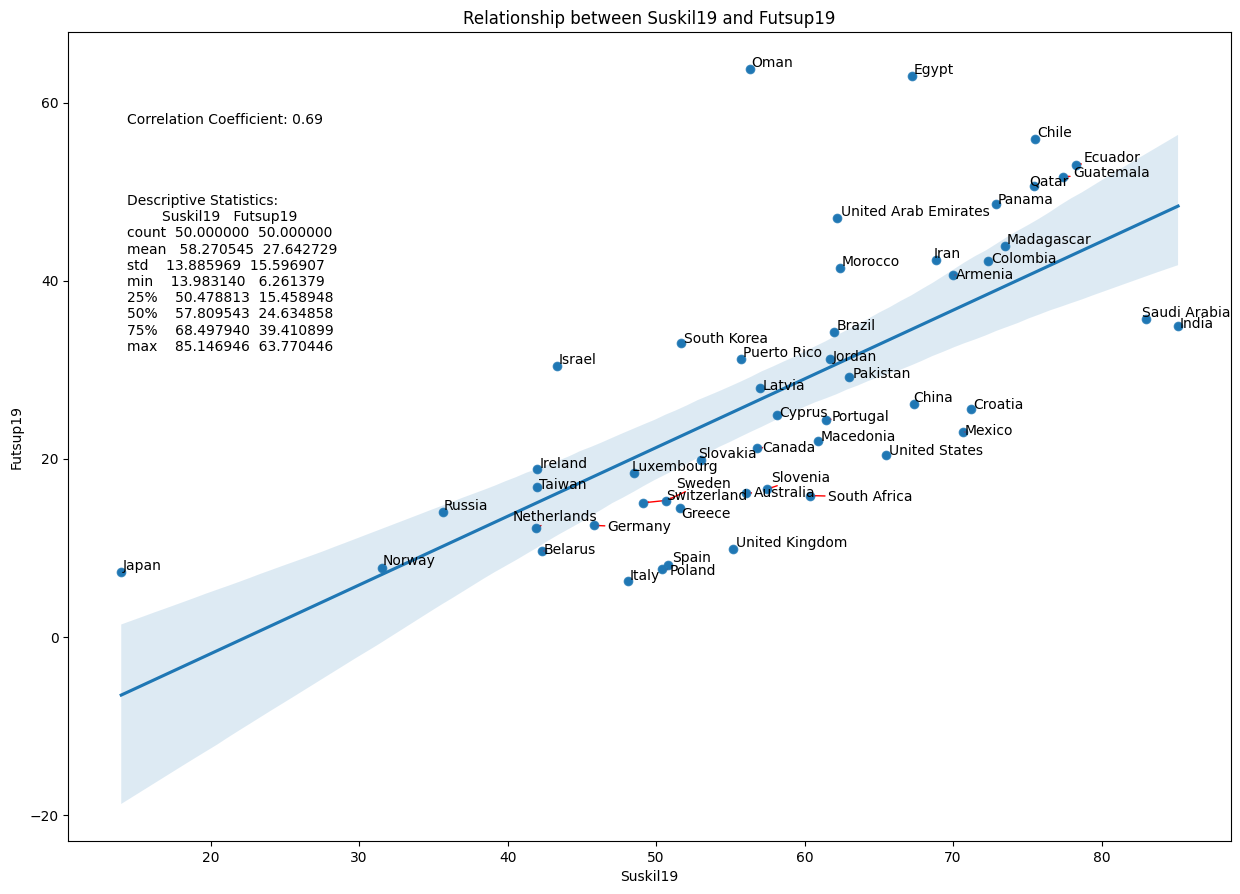

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(15, 10.5))

data_cleaned = data.dropna(subset=['Suskil19', 'Futsup19'])

sns.scatterplot(data=data_cleaned, x='Suskil19', y='Futsup19', ax=ax)

texts = []
for i, country in enumerate(data_cleaned['country']):
    texts.append(ax.text(data_cleaned['Suskil19'].iloc[i], data_cleaned['Futsup19'].iloc[i], country))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red',))

sns.regplot(data=data, x='Suskil19', y='Futsup19', ax=ax)

corr_coef, _ = pearsonr(data['Suskil19'], data['Futsup19'])
ax.text(0.05, 0.90, f'Correlation Coefficient: {corr_coef:.2f}', transform=ax.transAxes, verticalalignment='top')

descriptive_stats = data[['Suskil19', 'Futsup19']].describe()
ax.text(0.05, 0.80, f'Descriptive Statistics:\n{descriptive_stats}', transform=ax.transAxes, verticalalignment='top')

ax.set_xlabel('Suskil19')
ax.set_ylabel('Futsup19')
ax.set_title('Relationship between Suskil19 and Futsup19')

plt.show()


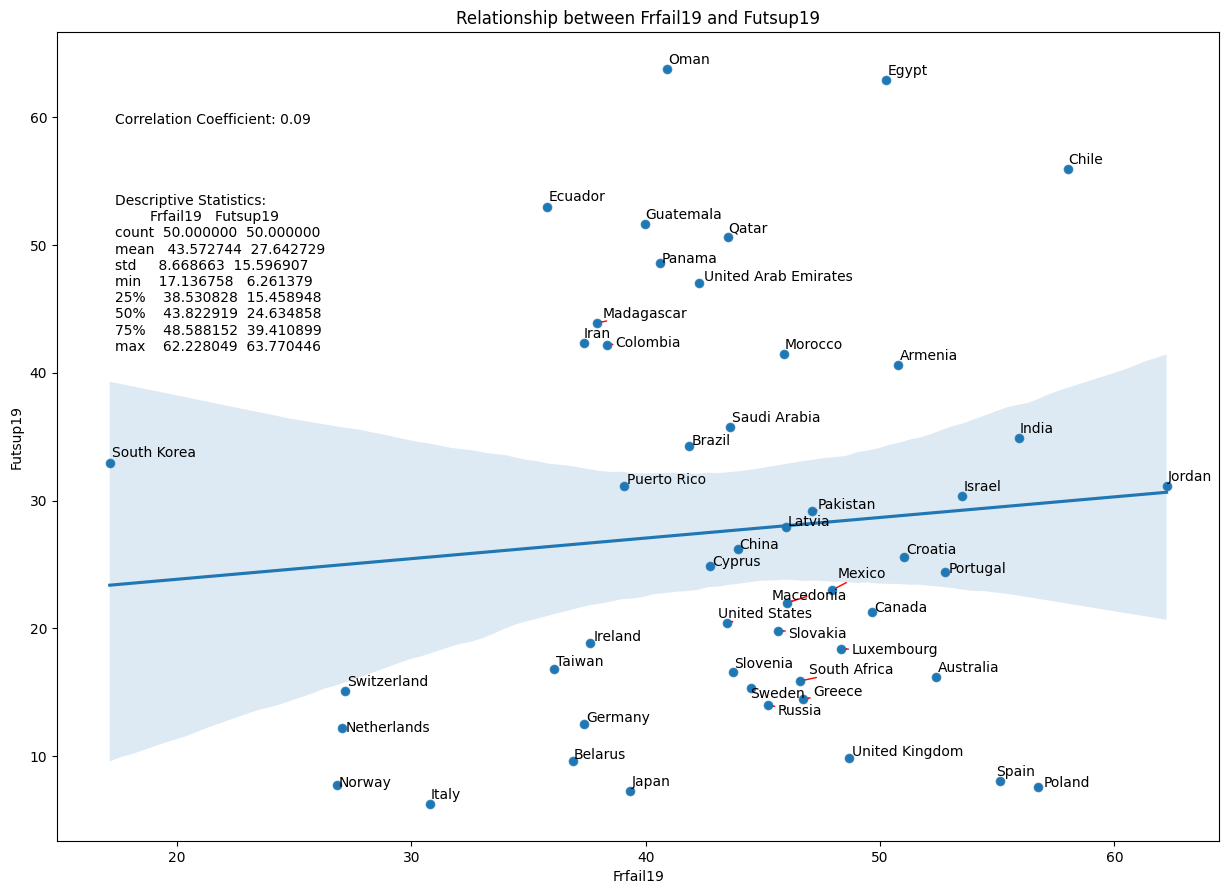

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(15, 10.5))

data_cleaned = data.dropna(subset=['Frfail19', 'Futsup19'])

sns.scatterplot(data=data_cleaned, x='Frfail19', y='Futsup19', ax=ax)

texts = []
for i, country in enumerate(data_cleaned['country']):
    texts.append(ax.text(data_cleaned['Frfail19'].iloc[i], data_cleaned['Futsup19'].iloc[i], country))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

sns.regplot(data=data, x='Frfail19', y='Futsup19', ax=ax)

corr_coef, _ = pearsonr(data['Frfail19'], data['Futsup19'])
ax.text(0.05, 0.90, f'Correlation Coefficient: {corr_coef:.2f}', transform=ax.transAxes, verticalalignment='top')

descriptive_stats = data[['Frfail19', 'Futsup19']].describe()
ax.text(0.05, 0.80, f'Descriptive Statistics:\n{descriptive_stats}', transform=ax.transAxes, verticalalignment='top')

ax.set_xlabel('Frfail19')
ax.set_ylabel('Futsup19')
ax.set_title('Relationship between Frfail19 and Futsup19')

plt.show()


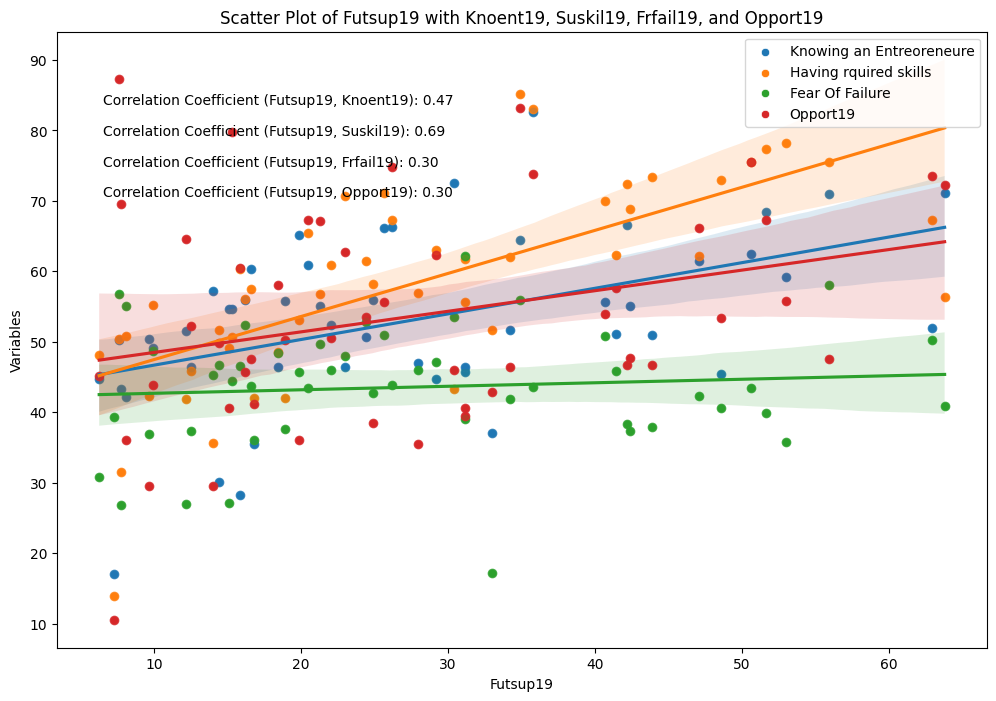

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=data, x='Futsup19', y='Knoent19', ax=ax)
sns.scatterplot(data=data, x='Futsup19', y='Suskil19', ax=ax)
sns.scatterplot(data=data, x='Futsup19', y='Frfail19', ax=ax) 
sns.scatterplot(data=data, x='Futsup19', y='Opport19', ax=ax)

sns.regplot(data=data, x='Futsup19', y='Knoent19', ax=ax)
sns.regplot(data=data, x='Futsup19', y='Suskil19', ax=ax)
sns.regplot(data=data, x='Futsup19', y='Frfail19', ax=ax)
sns.regplot(data=data, x='Futsup19', y='Opport19', ax=ax)

corr_coef1, _ = pearsonr(data['Futsup19'], data['Knoent19'])
corr_coef2, _ = pearsonr(data['Futsup19'], data['Suskil19'])
corr_coef3, _ = pearsonr(data['Futsup19'], data['Frfail19'])
corr_coef3, _ = pearsonr(data['Futsup19'], data['Opport19'])

descriptive_stats1 = data[['Futsup19', 'Knoent19']].describe()
descriptive_stats2 = data[['Futsup19', 'Suskil19']].describe()
descriptive_stats3 = data[['Futsup19', 'Frfail19']].describe()
descriptive_stats3 = data[['Futsup19', 'Opport19']].describe()

ax.text(0.05, 0.90, f'Correlation Coefficient (Futsup19, Knoent19): {corr_coef1:.2f}', transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.85, f'Correlation Coefficient (Futsup19, Suskil19): {corr_coef2:.2f}', transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.80, f'Correlation Coefficient (Futsup19, Frfail19): {corr_coef3:.2f}', transform=ax.transAxes, verticalalignment='top')
ax.text(0.05, 0.75, f'Correlation Coefficient (Futsup19, Opport19): {corr_coef3:.2f}', transform=ax.transAxes, verticalalignment='top')


ax.set_xlabel('Futsup19')
ax.set_ylabel('Variables')
ax.set_title('Scatter Plot of Futsup19 with Knoent19, Suskil19, Frfail19, and Opport19')

plt.legend(['Knowing an Entreoreneure', 'Having rquired skills', 'Fear Of Failure', "Opport19"])
plt.show()

